In [1]:
# library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# autoreload module
%load_ext autoreload
% autoreload 2

In [3]:
# import cleaner script
import cleaning_helper

In [4]:
dataframe = pd.read_csv("data/train.csv")

In [5]:
dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Expected problems
    1. Cabin has NaN values. No need to fix since concluding from the Tableau analysis we know that this is not important
    2. Age has NaN values. But this is important for modelling the data. So we need to figure out a way to fill these values without disturbing the data.
    3. Embarked has two missing values. We can simply fill these with the most frequent values.

In [6]:
dataframe.drop(labels=['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [7]:
dataframe[dataframe['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [8]:
cleaning_helper.fix_embarked(dataframe)

In [9]:
dataframe.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

## Working with the [Age](https://public.tableau.com/profile/gauscian#!/vizhome/tab-wkb/TitanicDataSetAnalysis?publish=yes) field
    1. Problem 1 : Want to convert the continuous to a nominal variable.
    2. Problem 2 : Remove the NaN values by replacing the values from roughly the same distribution.

![alt text](tableau-exports/AgeSurvived.png)

In [10]:
cleaning_helper.cont_discrete(dataframe, 10, 'Age')

In [11]:
dataframe.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,dis_Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


## Working with the [Fare](https://public.tableau.com/profile/gauscian#!/vizhome/tab-wkb/TitanicDataSetAnalysis?publish=yes) field
    1. As we know from the tableau analysis, this field has a direct impact on the number people surviving.

In [12]:
# Using the small plugin I just made for Age. Works for this too. 
cleaning_helper.cont_discrete(dataframe, 23, 'Fare')

![alt text](tableau-exports/Fare.png)

#### Cleaning up the older fields.

In [13]:
dataframe.drop(['Age', 'Fare'], inplace=True, axis=1)

In [14]:
dataframe.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,dis_Age,dis_Fare
0,0,3,"Braund, Mr. Owen Harris",male,1,0,S,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,0,0,S,2,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,S,1,2
4,0,3,"Allen, Mr. William Henry",male,0,0,S,1,0


In [15]:
# It is important to acknowledge that we do not have any more null values in our dataframe
dataframe.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Embarked    0
dis_Age     0
dis_Fare    0
dtype: int64

### Moving forward let's quickly create the nominal-string fields into nominal-integer fields 
This will enable us to use these fields for data modelling.

In [16]:
cleaning_helper.discretize_field(dataframe, 'Embarked')
cleaning_helper.discretize_field(dataframe, 'Sex')
# 0-male, 1-female, S - 0, C - 1, Q - 2

![alt text](tableau-exports/Class1SurvivedMore.png)

![alt text](tableau-exports/C'sPassengerSurviveMore.png)

![alt text](tableau-exports/FemalesSurvivedMore.png)

In [17]:
dataframe.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,dis_Age,dis_Fare,dis_Embarked,dis_Sex
0,0,3,"Braund, Mr. Owen Harris",male,1,0,S,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C,1,1,1,1
2,1,3,"Heikkinen, Miss. Laina",female,0,0,S,2,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,S,1,2,0,1
4,0,3,"Allen, Mr. William Henry",male,0,0,S,1,0,0,0


In [18]:
dataframe.drop(['Embarked', 'Sex'], axis=1,inplace=True)

In [19]:
dataframe.head()

,Survived,Pclass,Name,SibSp,Parch,dis_Age,dis_Fare,dis_Embarked,dis_Sex
0,0,3,"Braund, Mr. Owen Harris",1,0,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,1,1,1
2,1,3,"Heikkinen, Miss. Laina",0,0,2,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,2,0,1
4,0,3,"Allen, Mr. William Henry",0,0,1,0,0,0


## Working with the name column.
    1. The salutations of the names can directly help for inferencing the status of the person
    2. The status of the person directly related to his Survival.

In [20]:
cleaning_helper.working_with_names(dataframe)

     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
5           0       3                                   Moran, Mr. James   
6           0       1                            McCarthy, Mr. Timothy J   
7           0       3                     Palsson, Master. Gosta Leonard   
8           1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           1       2                Nasser, Mrs. Nicholas (Adele Achem)   
10          1       3                    Sandstrom, Miss. Marguerite Rut   
11          1       1                           Bonnell, Miss. Elizabeth   
12          

In [21]:
dataframe.dis_name.value_counts()

1    517
0    308
2     40
3     26
Name: dis_name, dtype: int64

In [22]:
dataframe.drop(['Name'], axis=1, inplace=True)

In [23]:
dataframe.head()

,Survived,Pclass,SibSp,Parch,dis_Age,dis_Fare,dis_Embarked,dis_Sex,dis_name
0,0,3,1,0,0,0,0,0,1
1,1,1,1,0,1,1,1,1,0
2,1,3,0,0,2,0,0,1,0
3,1,1,1,0,1,2,0,1,0
4,0,3,0,0,1,0,0,0,1


## Working with the [SibSp and Parch](https://public.tableau.com/profile/gauscian#!/vizhome/tab-wkb/TitanicDataSetAnalysis?publish=yes).
    1. People with some one are more likely to survive since they stick together

In [24]:
cleaning_helper.have_siblings_not(dataframe)

![alt text](tableau-exports/RelationshipEffect.png)

In [25]:
dataframe.head()

,Survived,Pclass,SibSp,Parch,dis_Age,dis_Fare,dis_Embarked,dis_Sex,dis_name,hasSomeOne
0,0,3,1,0,0,0,0,0,1,1
1,1,1,1,0,1,1,1,1,0,1
2,1,3,0,0,2,0,0,1,0,0
3,1,1,1,0,1,2,0,1,0,1
4,0,3,0,0,1,0,0,0,1,0


In [26]:
dataframe.drop(['SibSp','Parch'], axis=1, inplace=True)
dataframe.head()

,Survived,Pclass,dis_Age,dis_Fare,dis_Embarked,dis_Sex,dis_name,hasSomeOne
0,0,3,0,0,0,0,1,1
1,1,1,1,1,1,1,0,1
2,1,3,2,0,0,1,0,0
3,1,1,1,2,0,1,0,1
4,0,3,1,0,0,0,1,0


In [27]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
dis_Age         891 non-null int32
dis_Fare        891 non-null int32
dis_Embarked    891 non-null int64
dis_Sex         891 non-null int64
dis_name        891 non-null int64
hasSomeOne      891 non-null int64
dtypes: int32(2), int64(6)
memory usage: 48.8 KB


# Just before getting into modelling let us transform our test data


In [28]:
# Importing the test data
df_test = pd.read_csv("data/test.csv")

In [29]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
cleaning_helper.complete_pipeline(df_test)

     Pclass                                               Name  SibSp  Parch  \
0         3                                   Kelly, Mr. James      0      0   
1         3                   Wilkes, Mrs. James (Ellen Needs)      1      0   
2         2                          Myles, Mr. Thomas Francis      0      0   
3         3                                   Wirz, Mr. Albert      0      0   
4         3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)      1      1   
5         3                         Svensson, Mr. Johan Cervin      0      0   
6         3                               Connolly, Miss. Kate      0      0   
7         2                       Caldwell, Mr. Albert Francis      1      1   
8         3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)      0      0   
9         3                            Davies, Mr. John Samuel      2      0   
10        3                                   Ilieff, Mr. Ylio      0      0   
11        1                         Jone

In [31]:
df_test.head()

,Pclass,dis_Age,dis_Fare,dis_Embarked,dis_Sex,dis_name,hasSomeOne
0,3,0,0,0,0,1,0
1,3,1,0,1,1,0,1
2,2,2,0,0,0,1,0
3,3,3,0,1,0,1,0
4,3,4,0,1,1,0,1


# Modelling the Data
## At this point we can conclude that the data is now ready for making predictions

In [46]:
# let us get started with importing all the machinery we will be needing

#1. the classifier it self
from sklearn.neighbors import KNeighborsClassifier

#2. metrics to be able to evaluate the model
from sklearn import metrics

#3. Train test split because we need a machinery to test our model and we do not want to use the entire dataset for it. Avoid overfitting.
from sklearn.model_selection import train_test_split

#4. An even further improvement. t-t gives a high variance estimate. So K-Fold estimate.
from sklearn.model_selection import cross_val_score

In [41]:
# instantiating the estimator - In sklearn the models are called estimators since they estimate on new data
knn = KNeighborsClassifier(n_neighbors=5)

In [42]:
# Converting the data to numpy arrays and creating the training matrix
X = np.array(dataframe.loc[:, dataframe.columns != 'Survived'])
y = np.array(dataframe['Survived'])

In [43]:
# creating a train test split - high variance estimate. But cheap so okay - worth knowing.
# Whay about skewed data  ? Of train test split uses stratified sampling by default.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
y_pred = knn.predict(X_test)

In [45]:
metrics.accuracy_score(y_test, y_pred)

0.8212290502793296

In [61]:
# let us use the K-Fold Cross Validation to be more confident of our model.
k_range = list(range(1, 31))
sc_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # scores contains a list of scores over systematic train-test split as done in k-fold.
    sc_list.append(scores.mean()) # we take the mean and append it to the resultant list.

In [62]:
print('max = ', max(sc_list))
print('min = ', min(sc_list))

max =  0.793641187152423
min =  0.7328776529338328


In [64]:
# Selecting the best k - More k means more simplicity. Yeah

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

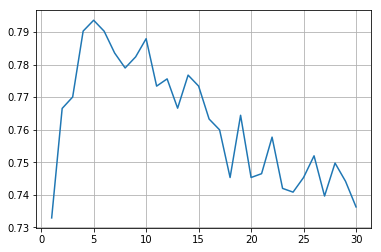

In [72]:
plt.plot(k_range, sc_list)
plt.grid(True)

Clear now that k=5 is the best value for KNN to classify this data set.

##### Confusion Matrix on the model trained on complete data.

In [75]:
knn_complete = KNeighborsClassifier(n_neighbors=5)
knn_complete.fit(X,y)
y_pred_c = knn_complete.predict(X)

In [77]:
metrics.accuracy_score(y, y_pred_c)

0.8496071829405163

In [86]:
# test predictions. Will have to wait to submit the results to Kaggle.
knn_complete.predict(df_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [76]:
print(metrics.confusion_matrix(y, y_pred_c))

[[487  62]
 [ 72 270]]


In [78]:
# Sensitivity = TPR = Recall
270 / (270 + 72)

0.7894736842105263

In [79]:
# Specificity
487 / (487 + 62)

0.8870673952641166

In [81]:
# let us now try out a Logistic Regression Classifier with default configurations
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.7822159800249688


In [83]:
# Let us try training and testing on the complete data set
logreg.fit(X, y)
metrics.accuracy_score(y, logreg.predict(X))

0.7867564534231201

In [88]:
# Logistic Regression seems to perform the same where as k means
# Next let us try to train a boosting classifier.